In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv(r"uber.csv")
# test_df=pd.read_csv(r"test.csv")
print (data.shape)
print (data.columns)

(200000, 9)
Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')


In [3]:
data_x = data.iloc[:,0:-1].values
data_y = data.iloc[:,-1].values
print(data_y)

[1 1 1 ... 2 1 1]


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
data["pickup_datetime"]=pd.to_datetime(data['pickup_datetime'])


In [7]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


# As this is Taxi fare data and 
we know there are many factors which affect the price of taxi like
Travelled distance
Time of Travel
Demand and Availability of Taxi
Some special places are more costlier like Airport or other places where there might be toll


In [8]:
data.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


Here first thing which we can see is minimum value of fare is negative which is -62 which is not the valid value, so we need to remove the fare which are negative values.
Secondly, passenger_count minimum value is 0 and maximum value is 208 which impossible, so we need to remove them as well, for safer side we can think that a taxi can have maximum 7 people.

In [9]:
#Lets check if there is any null value
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

Here we can see there are 14 null values in drop_off latitude and longitude. as removing 14 to 28 rows from our huge dataset will not affect our analysis so, lets remove the rows having null values

In [12]:
data.dropna(inplace=True)
print(data.isnull().sum())

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

c:\users\kedar\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

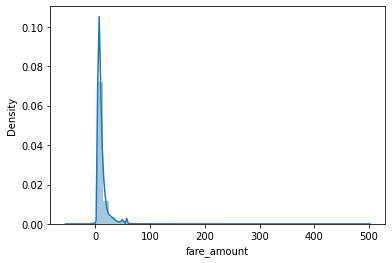

In [15]:
sns.distplot(data['fare_amount'])

In distribution plot also it can be seen that there are some values which are negative fare

c:\users\kedar\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pickup_latitude', ylabel='Density'>

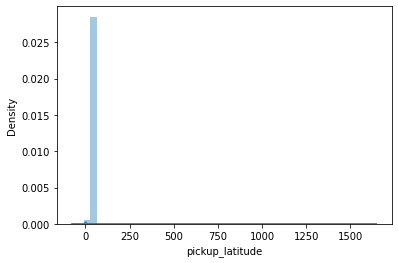

In [18]:
sns.distplot(data['pickup_latitude'])

Here we can see minimum value is going to be less than even -3000 which is not correct value and also on positive side also going more than 2000

c:\users\kedar\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pickup_longitude', ylabel='Density'>

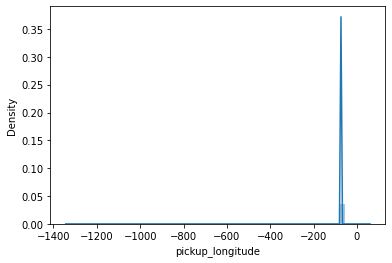

In [20]:
sns.distplot(data['pickup_longitude'])

Here also negative and positive values are excedding far behond the real limit.

c:\users\kedar\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dropoff_longitude', ylabel='Density'>

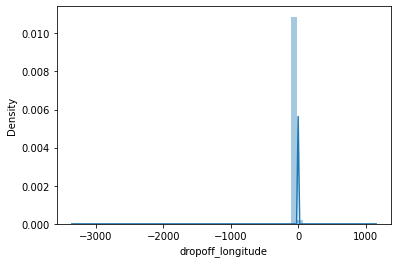

In [21]:
sns.distplot(data['dropoff_longitude'])

c:\users\kedar\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dropoff_latitude', ylabel='Density'>

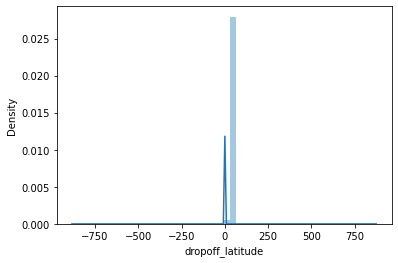

In [23]:
#Similarly here also same issue
sns.distplot(data['dropoff_latitude'])

In [24]:
print("drop_off latitude min value",data["dropoff_latitude"].min())
print("drop_off latitude max value",data["dropoff_latitude"].max())
print("drop_off longitude min value", data["dropoff_longitude"].min())
print("drop_off longitude max value",data["dropoff_longitude"].max())
print("pickup latitude min value",data["pickup_latitude"].min())
print("pickup latitude max value",data["pickup_latitude"].max())
print("pickup longitude min value",data["pickup_longitude"].min())
print("pickup longitude max value",data["pickup_longitude"].max())

drop_off latitude min value -881.9855130000001
drop_off latitude max value 872.6976279999999
drop_off longitude min value -3356.6663
drop_off longitude max value 1153.5726029999998
pickup latitude min value -74.01551500000001
pickup latitude max value 1644.421482
pickup longitude min value -1340.64841
pickup longitude max value 57.418457


we can see what is range of latitude and longitude of our test dataset, lets keep the range same in our train set so that even noisy data is remove and we have only the values which belongs to new york

In [25]:
min_longitude=-74.263242,
min_latitude=40.573143,
max_longitude=-72.986532, 
max_latitude=41.709555

In [26]:
#lets drop all the values which are not coming in above boundary, as those are noisy data

In [27]:
tempdf=data[(data["dropoff_latitude"]<min_latitude) | (data["pickup_latitude"]<min_latitude) | (data["dropoff_longitude"]<min_longitude) | (data["pickup_longitude"]<min_longitude) | (data["dropoff_latitude"]>max_latitude) | (data["pickup_latitude"]>max_latitude) | (data["dropoff_longitude"]>max_longitude) | (data["pickup_longitude"]>max_longitude) ]
print("before droping",data.shape)
data.drop(tempdf.index,inplace=True)
print("after droping",data.shape)

before droping (199999, 9)
after droping (195732, 9)


In [28]:
#lets remove all those rows where fare amount is negative

In [29]:
print("before droping", data.shape)
train_df=data[data['fare_amount']>0]
print("after droping", data.shape)

before droping (195732, 9)
after droping (195732, 9)


On different day and time there would be different price like during eveing price would be more compare to afternoon, during christmas price would be different and similarly on weekends price would be different compare to week days. so lets create some extra features which will take care of all these things

In [30]:
import calendar
data['day']=data['pickup_datetime'].apply(lambda x:x.day)
data['hour']=data['pickup_datetime'].apply(lambda x:x.hour)
data['weekday']=data['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
data['month']=data['pickup_datetime'].apply(lambda x:x.month)
data['year']=data['pickup_datetime'].apply(lambda x:x.year)

In [31]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,7,19,Thursday,5,2015
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,17,20,Friday,7,2009
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,24,21,Monday,8,2009
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,26,8,Friday,6,2009
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,28,17,Thursday,8,2014


In [ ]:
#here we can see that week are in monday , tuesday and so on. So we need convert them in numerical for

In [32]:
data.weekday = data.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195732 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         195732 non-null  int64              
 1   key                195732 non-null  object             
 2   fare_amount        195732 non-null  float64            
 3   pickup_datetime    195732 non-null  datetime64[ns, UTC]
 4   pickup_longitude   195732 non-null  float64            
 5   pickup_latitude    195732 non-null  float64            
 6   dropoff_longitude  195732 non-null  float64            
 7   dropoff_latitude   195732 non-null  float64            
 8   passenger_count    195732 non-null  int64              
 9   day                195732 non-null  int64              
 10  hour               195732 non-null  int64              
 11  weekday            195732 non-null  int64              
 12  month              195732 non-

In [34]:
# we will keep only those rows where number of passangers are less than or equal to 8

In [35]:
data=data[data['passenger_count']<=8]

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195731 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         195731 non-null  int64              
 1   key                195731 non-null  object             
 2   fare_amount        195731 non-null  float64            
 3   pickup_datetime    195731 non-null  datetime64[ns, UTC]
 4   pickup_longitude   195731 non-null  float64            
 5   pickup_latitude    195731 non-null  float64            
 6   dropoff_longitude  195731 non-null  float64            
 7   dropoff_latitude   195731 non-null  float64            
 8   passenger_count    195731 non-null  int64              
 9   day                195731 non-null  int64              
 10  hour               195731 non-null  int64              
 11  weekday            195731 non-null  int64              
 12  month              195731 non-

In [37]:
#here key column and pickup_datetime columns are not needed as we have already created variables extracted from it

In [38]:
data.drop(["key","pickup_datetime"], axis=1, inplace=True)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195731 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         195731 non-null  int64  
 1   fare_amount        195731 non-null  float64
 2   pickup_longitude   195731 non-null  float64
 3   pickup_latitude    195731 non-null  float64
 4   dropoff_longitude  195731 non-null  float64
 5   dropoff_latitude   195731 non-null  float64
 6   passenger_count    195731 non-null  int64  
 7   day                195731 non-null  int64  
 8   hour               195731 non-null  int64  
 9   weekday            195731 non-null  int64  
 10  month              195731 non-null  int64  
 11  year               195731 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 19.4 MB


lets divide the data set into train and validation test set

In [40]:
from sklearn.model_selection import train_test_split

In [54]:
x=data.drop("fare_amount", axis=1)

In [55]:
y=data['fare_amount']

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [57]:
x_train.head()

,Unnamed: 0,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
7570,51992033,-73.991973,40.742657,-73.991358,40.750086,1,31,22,1,10,2011
155037,10241908,-73.964111,40.807957,-73.966688,40.803299,1,18,14,3,6,2014
67010,48963133,-73.987658,40.700823,-73.985670,40.770540,1,2,22,0,2,2014
155236,30446807,-73.999577,40.726656,-74.007562,40.713286,1,29,18,3,5,2013
187226,40739497,-73.983377,40.738938,-73.978432,40.745286,1,12,2,6,6,2010


In [58]:
x_test.head()

,Unnamed: 0,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
51869,5536882,-73.953347,40.767932,-73.990867,40.751295,5,8,17,0,11,2009
44724,35054768,-73.137393,41.366138,-73.137393,41.366138,2,11,20,0,7,2010
47705,15258057,-74.009707,40.712480,-73.962757,40.758977,1,3,21,0,7,2011
17345,34739111,-74.016055,40.715077,-74.008840,40.711375,3,4,6,5,1,2013
179351,53446498,-73.950474,40.784003,-73.971086,40.748328,1,18,22,0,9,2011


In [59]:
x_train.shape

(156584, 11)

In [60]:
x_test.shape

(39147, 11)

In [61]:

#Lets run the model.
#As we have to build regression model, lets start with linear regression model

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lrmodel=LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression()

In [64]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(n_jobs=1, normalize=False)

In [65]:
predictedvalues = lrmodel.predict(x_test)

In [66]:
#lets calculate rmse for linear Regression model
from sklearn.metrics import mean_squared_error
lrmodelrmse = np.sqrt(mean_squared_error(predictedvalues, y_test))
print("RMSE value for Linear regression is", lrmodelrmse)

RMSE value for Linear regression is 8.363019859396488


In [71]:
#Lets see with Random Forest and calculate its rmse
from sklearn.ensemble import RandomForestRegressor
# rfrmodel = RandomForestRegressor(n_estimators=100, random_state=101)
rfrmodel = RandomForestRegressor(n_estimators=50, random_state=101)

In [72]:
rfrmodel.fit(x_train,y_train)

RandomForestRegressor(n_estimators=50, random_state=101)

In [74]:
rfrmodel_pred= rfrmodel.predict(x_test)

In [75]:
rfrmodel_rmse=np.sqrt(mean_squared_error(rfrmodel_pred, y_test))
print("RMSE value for Random forest regression is ",rfrmodel_rmse)

RMSE value for Random forest regression is  3.9973617568779463


In [76]:
#RandomForest Regressor is giving good value, so we can use it as final model